<a href="https://colab.research.google.com/github/bytewithpalak/Polymer-Classification-using-ML/blob/main/Polymer_Classification_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [351]:
df= pd.read_csv('/content/polymers_dataset.csv')

In [352]:
df

,Unnamed: 0,smiles,label,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,C(Cl)CCC(c1ccccc1)CCC(Cl)C,plastic,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,OC(=O)[C@]([H])(CC1=CC=C(O)C=C1)NC(=O)[C@]([H]...,peptide,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,O[C@]([C@@]([H])(CO)O[C@@](O)([H])[C@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,C(Cl)CCC(c1ccccc1)C(Cl)CCC,plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,CCC(Cl)CC(Cl)CCCC(C)CCC(c1ccccc1),plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20604,20604,C(Cl)CCCC(C)CC(Cl)CC(C)CC(Cl)C,plastic,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20605,20605,O[C@@]([C@]([H])(CO)O[C@](O)([H])[C@@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20606,20606,O[C@]([C@]([H])(CO)O[C@](O)([H])[C@]([H])1O)([...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20607,20607,OC(=O)[C@@]([H])(CS)NC(=O)[C@]([H])(CCSC)NC(=O...,peptide,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [353]:
df.head()


,Unnamed: 0,smiles,label,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,C(Cl)CCC(c1ccccc1)CCC(Cl)C,plastic,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,OC(=O)[C@]([H])(CC1=CC=C(O)C=C1)NC(=O)[C@]([H]...,peptide,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,O[C@]([C@@]([H])(CO)O[C@@](O)([H])[C@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,C(Cl)CCC(c1ccccc1)C(Cl)CCC,plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,CCC(Cl)CC(Cl)CCCC(C)CCC(c1ccccc1),plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20609 entries, 0 to 20608
Columns: 2051 entries, Unnamed: 0 to 2047
dtypes: int64(2049), object(2)
memory usage: 322.5+ MB


In [355]:
df.isnull().sum()

,0
Unnamed: 0,0
smiles,0
label,0
0,0
1,0
...,...
2043,0
2044,0
2045,0
2046,0


In [356]:
print("Shape of Dataset:",df.shape)

Shape of Dataset: (20609, 2051)


In [357]:
print("Columns of Dataset:",df.columns)

Columns of Dataset: Index(['Unnamed: 0', 'smiles', 'label', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047'],
      dtype='object', length=2051)


In [358]:
 df.drop(columns=['Unnamed: 0'],inplace=True)

In [359]:
print(df.shape)


(20609, 2050)


In [360]:
X=df.drop(columns=['label','smiles'])
y=df['label']

In [361]:
X.shape

(20609, 2048)

In [362]:
y.shape

(20609,)

In [363]:
y

,label
0,plastic
1,peptide
2,oligosaccharide
3,plastic
4,plastic
...,...
20604,plastic
20605,oligosaccharide
20606,oligosaccharide
20607,peptide


In [364]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [365]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [366]:
print("Training data shape:", X_train.shape)

Training data shape: (12365, 2048)


In [367]:
print(X.shape)

(20609, 2048)


In [368]:
print("Testing data shape:", X_test.shape)

Testing data shape: (8244, 2048)


RANDOM FOREST CLASSIFIER


In [369]:
model= RandomForestClassifier(n_estimators=100, random_state=42)

In [370]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [371]:
y_pred=model.predict(X_test)

In [372]:
y_pred

array([2, 0, 0, ..., 1, 2, 0])

In [373]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))

Accuracy: 1.0


In [374]:
print ("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      1.00      1.00      2789
           2       1.00      1.00      1.00      2759

    accuracy                           1.00      8244
   macro avg       1.00      1.00      1.00      8244
weighted avg       1.00      1.00      1.00      8244



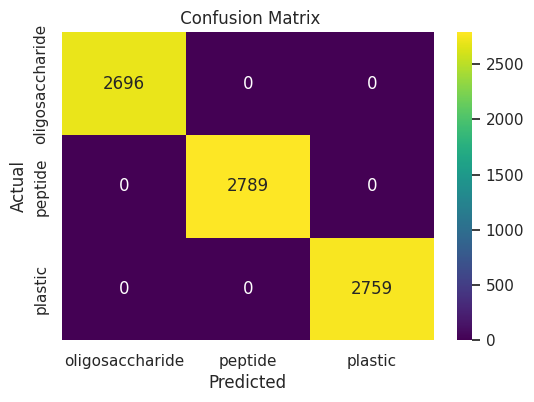

In [375]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()

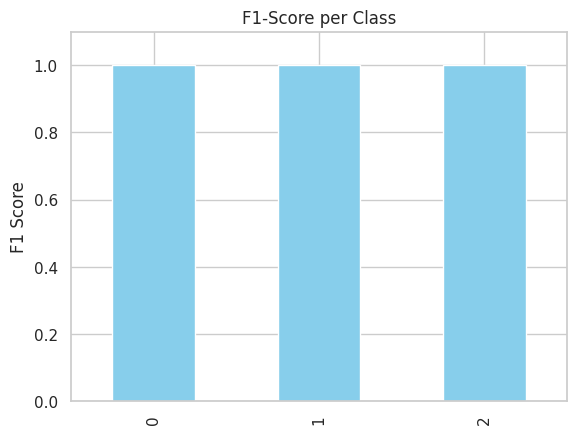

In [376]:
report = classification_report(y_test, y_pred, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='skyblue')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

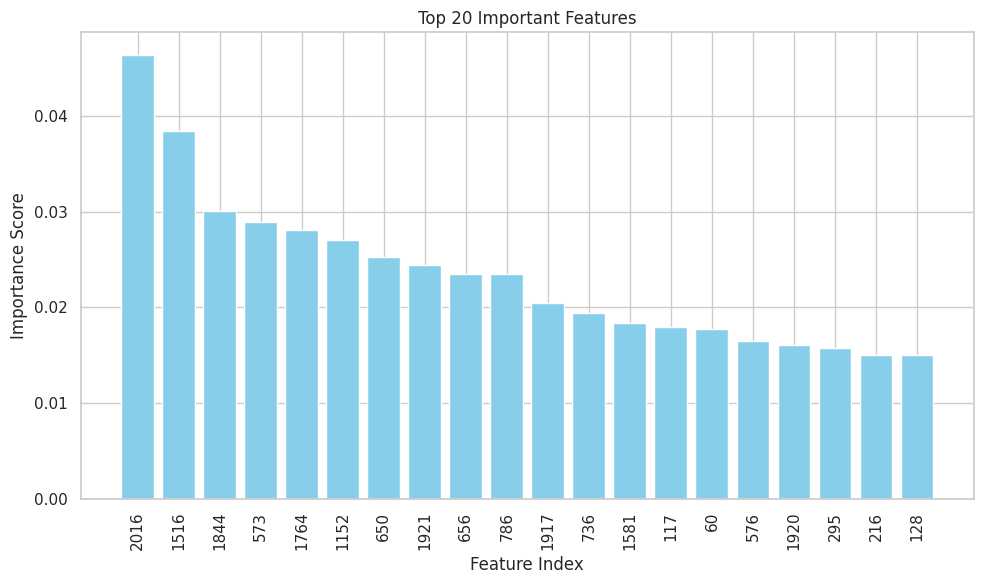

In [377]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

 KNN



In [378]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)



In [379]:
y_pred

array([2, 0, 0, ..., 1, 2, 0])

In [380]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9929645803008248

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      0.98      0.99      2789
           2       0.98      1.00      0.99      2759

    accuracy                           0.99      8244
   macro avg       0.99      0.99      0.99      8244
weighted avg       0.99      0.99      0.99      8244



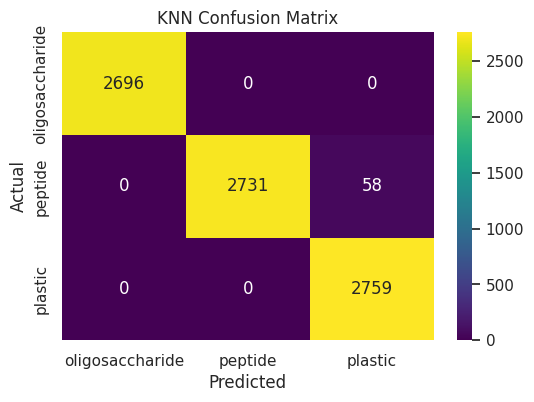

In [381]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

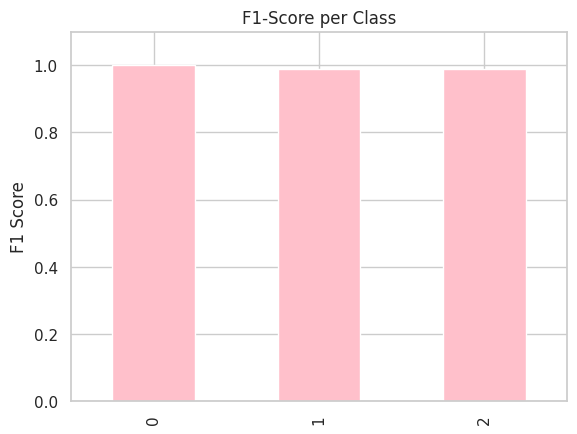

In [382]:
report = classification_report(y_test, y_pred_knn, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='pink')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

In [383]:
from sklearn.svm import SVC

svm= SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm=svm.predict(X_test)

In [384]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      1.00      1.00      2789
           2       1.00      1.00      1.00      2759

    accuracy                           1.00      8244
   macro avg       1.00      1.00      1.00      8244
weighted avg       1.00      1.00      1.00      8244



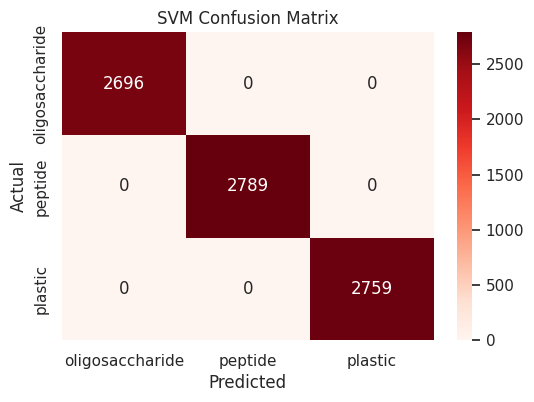

In [385]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [386]:
!pip install xgboost

In [387]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [388]:
y_pred_xgb = xgb_model.predict(X_test)

In [389]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

print("\nXGBoost Classification Report:\n",
      classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      1.00      1.00      2789
           2       1.00      1.00      1.00      2759

    accuracy                           1.00      8244
   macro avg       1.00      1.00      1.00      8244
weighted avg       1.00      1.00      1.00      8244



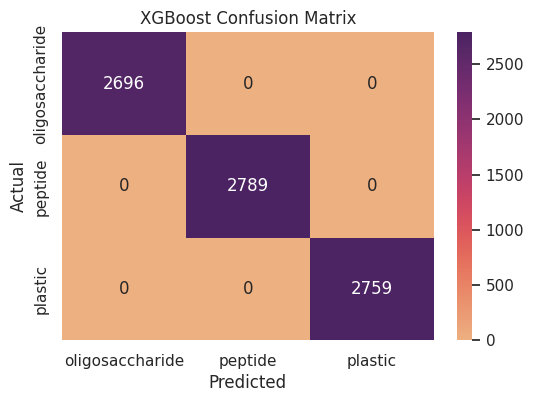

In [391]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='flare',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

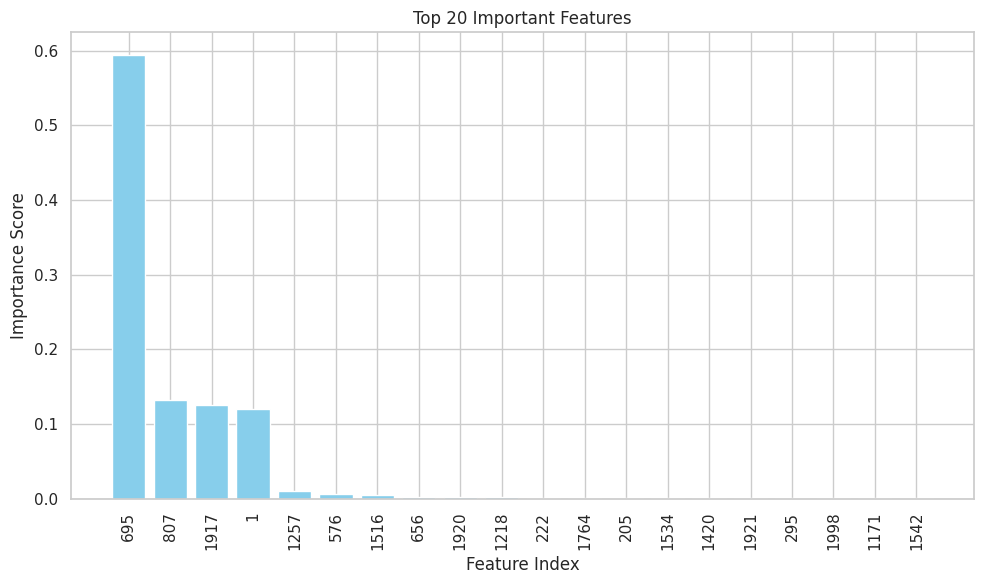

In [392]:
importances = xgb_model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [395]:
results = {
    "Model": ["Random Forest", "KNN", "SVM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb)
    ]
}

df_results = pd.DataFrame(results)
df_results

,Model,Accuracy
0,Random Forest,1.000000
1,KNN,0.992965
2,SVM,1.000000
3,XGBoost,1.000000


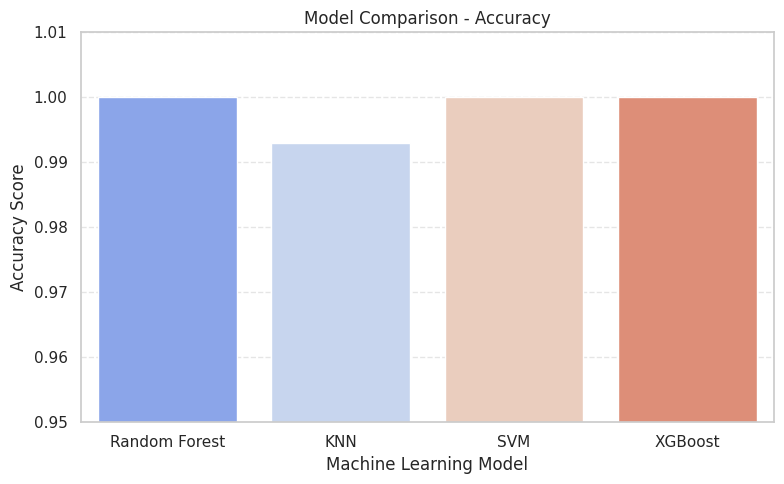

In [396]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')
plt.ylim(0.95, 1.01)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Model")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [399]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Get probability predictions
y_prob_xgb = xgb_model.predict_proba(X_test)

# Binarize the test labels (for multi-class ROC)
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=[0,1,2])

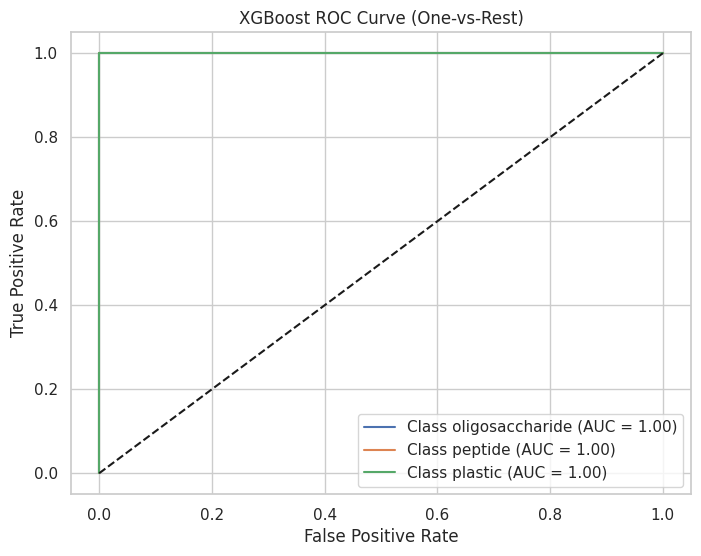

In [400]:
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_xgb[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"Class {encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

In [402]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 13.2 MB/s eta 0:00:00


In [403]:
from rdkit import Chem

In [404]:
from rdkit import Chem

mol = Chem.MolFromSmiles("CCO")
print(mol)

In [405]:
from rdkit.Chem import AllChem
import numpy as np

def smiles_to_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.array(fp)
    return arr.reshape(1, -1)

In [406]:
features = smiles_to_features("CCO")
prediction = model.predict(features)

[16:04:36] DEPRECATION WARNING: please use MorganGenerator


In [407]:
import joblib

# Save trained XGBoost model
joblib.dump(xgb_model, "model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save label encoder
joblib.dump(encoder, "encoder.pkl")

print("All files saved successfully!")

All files saved successfully!
